# Capstone Project

Health and Nutrition Data from CDC and NHANES

In [1]:
import pandas as pd     # Import pandas for better viewing of Dataframes

In [2]:
pwd                     # Useful for loading data

'c:\\Users\\srnwn\\Documents\\neueFische\\Capstone\\scripts'

In [3]:
demo = pd.read_csv("../data/NHANES_2013-2014/demographics.csv")
# demo_var = pd.read_excel("../data/NHANES_2013-2014/demographics_variables.xlsx").iloc[:,0:2]
diet = pd.read_csv("../data/NHANES_2013-2014/dietary.csv")
# diet_var = pd.read_excel("../data/NHANES_2013-2014/dietary_variables.xlsx").iloc[:,0:2]
exam = pd.read_csv("../data/NHANES_2013-2014/examination.csv")
# exam_var = pd.read_excel("../data/NHANES_2013-2014/examination_variables.xlsx")
lab = pd.read_csv("../data/NHANES_2013-2014/laboratory.csv")
# lab_var = pd.read_excel("../data/NHANES_2013-2014/laboratory_variables.xlsx")
quest = pd.read_csv("../data/NHANES_2013-2014/questionnaire.csv")
# quest_var = pd.read_excel("../data/NHANES_2013-2014/questionnaire_variables.xlsx")


# Data Clean-up

## Demographic

We want only certain variables! Filter for those :)

In [ ]:
demo_clean = demo.loc[:,[
    "SEQN",                 # ID
    "RIAGENDR",             # Gender
    "RIDAGEYR",             # Age
    "RIDRETH3",             # Ethnicity
    "DMDBORN4",             # Country of Birth
    "DMDCITZN",             # US-Citizenship
    "DMDEDUC2",             # Highschool Grad?
    "DMDEDUC3",             # College Degree?
    "DMDHHSIZ",             # Household Size
    "DMDHHSZA",             # No of Kids < 6 yr in Household?
    "DMDHHSZB",             # No of Kids between 6 and 17
    "INDFMIN2",             # Total family Income
    "RIDEXPRG"              # Pregnancy status
    ]]

In [5]:
demo_columns = {
    "SEQN" : "ID",
    "RIAGENDR": "gender",
    "RIDAGEYR": "age",
    "RIDRETH3": 'ethnicity',
    "DMDBORN4": "country_of_birth",
    "DMDCITZN": "us_citizen",
    "DMDEDUC2": "high_school_deg",
    "DMDEDUC3": "college_deg",
    "DMDHHSIZ": "household_size",
    "DMDHHSZA": "no_of_kids_u6",
    "DMDHHSZB": "no_of_kids_btw_6_17",
    "INDFMIN2": "total_income",
    "RIDEXPRG": "pregnancy_status"
    }

In [6]:
demo_clean.rename(columns=demo_columns, inplace = True)

In [7]:
demo_clean

,ID,gender,age,ethnicity,country_of_birth,us_citizen,high_school_deg,college_deg,household_size,no_of_kids_u6,no_of_kids_btw_6_17,total_income,pregnancy_status
0,73557.0,1.0,69.0,4.0,1.0,1.0,3.0,NaN,3.0,0.0,0.0,4.0,NaN
1,73558.0,1.0,54.0,3.0,1.0,1.0,3.0,NaN,4.0,0.0,2.0,7.0,NaN
2,73559.0,1.0,72.0,3.0,1.0,1.0,4.0,NaN,2.0,0.0,0.0,10.0,NaN
3,73560.0,1.0,9.0,3.0,1.0,1.0,NaN,3.0,4.0,0.0,2.0,9.0,NaN
4,73561.0,2.0,73.0,3.0,1.0,1.0,5.0,NaN,2.0,0.0,0.0,15.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,83727.0,1.0,26.0,2.0,1.0,1.0,5.0,NaN,5.0,0.0,0.0,77.0,NaN
10171,83728.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN,4.0,1.0,1.0,8.0,NaN
10172,83729.0,2.0,42.0,4.0,2.0,1.0,5.0,NaN,1.0,0.0,0.0,7.0,2.0
10173,83730.0,1.0,7.0,2.0,1.0,1.0,NaN,0.0,4.0,1.0,1.0,6.0,NaN


## Dietary Data Filtering

In [8]:
diet_clean = diet.loc[:,[
    'SEQN',                 # ID
    'DR1TKCAL',             # Total Calories
    'DR1TPROT',             # Total Protein
    'DR1TCARB',             # Total Carbohydrates
    'DR1TSUGR',             # Total Sugar
    'DR1_320Z',             # Total Water drank
    'DR1TTFAT',             # Total Fat
    'DR1TMFAT',             # MUFA
    'DR1TPFAT',             # PUFA
    'DR1TCHOL',             # Cholesterin
    'DR1TFIBE',             # Total Fiber
    'DR1TALCO',             # Total Alcohol
    'DR1TVARA',             # Vit A
    'DR1TVB1',              # Vit B1 (Thiamin)
    'DR1TVB2',              # Vit B2 (Riboflavin)
    'DR1TNIAC',             # Vit B3 (Niacin)
    'DR1TVB6',              # Vit B6 (Pyridoxin)
    'DR1TFA',               # Vit B9 (Folic Acid)
    'DR1TVB12',             # Vit B12 (Cobalamin)
    'DR1TVC',               # Vit C
    'DR1TVD',               # Vit D
    'DR1TATOC',             # Vit E
    'DR1TCALC',             # Calcium
    'DR1TIRON',             # Iron
    'DR1TZINC',             # Zinc
    'DR1TSODI',             # Sodium
    'DR1TPOTA',             # Potassium
    'DR1TCAFF'              # Caffeine
    ]]

In [9]:
diet_columns = {
    'SEQN': 'ID',
    'DR1TKCAL': 'daily_calories',
    'DR1TPROT': 'total_protein',
    'DR1TCARB': 'total_carbohydrates',
    'DR1TSUGR': 'total_sugar',
    'DR1_320Z': 'total_water',
    'DR1TTFAT': 'total_fat',
    'DR1TMFAT': 'mufa',
    'DR1TPFAT': 'pufa',
    'DR1TCHOL': 'cholesterin_diet',
    'DR1TFIBE': 'total_fiber',
    'DR1TALCO': 'total_alcohol',
    'DR1TVARA': 'vit_a',
    'DR1TVB1': 'vit_b1',
    'DR1TVB2': 'vit_b2',
    'DR1TNIAC': 'vit_b3',
    'DR1TVB6': 'vit_b6',
    'DR1TFA': 'vit_b9',
    'DR1TVB12': 'vit_b12',
    'DR1TVC': 'vit_c',
    'DR1TVD': 'vit_d_diet',
    'DR1TATOC': 'vit_e',
    'DR1TCALC': 'calcium',
    'DR1TIRON': 'iron',
    'DR1TZINC': 'zinc',
    'DR1TSODI': 'sodium',
    'DR1TPOTA': 'potassium',
    'DR1TCAFF': 'caffeine'
}

In [10]:
diet_clean.rename(columns=diet_columns, inplace = True)

In [11]:
diet_clean

,ID,daily_calories,total_protein,total_carbohydrates,total_sugar,total_water,total_fat,mufa,pufa,cholesterin_diet,...,vit_b12,vit_c,vit_d_diet,vit_e,calcium,iron,zinc,sodium,potassium,caffeine
0,73557.0,1574.0,43.63,239.59,176.47,960.0,52.81,18.493,8.829,209.0,...,2.79,241.4,3.3,3.92,949.0,8.41,8.85,1323.0,2228.0,203.0
1,73558.0,5062.0,338.13,423.78,44.99,360.0,124.29,35.481,20.505,2584.0,...,21.45,2.3,15.2,20.94,3193.0,26.88,30.36,9726.0,4930.0,240.0
2,73559.0,1743.0,64.61,224.39,102.90,1254.0,65.97,20.902,12.953,88.0,...,3.78,195.1,4.0,8.87,877.0,17.57,8.98,2943.0,1694.0,45.0
3,73560.0,1490.0,77.75,162.92,80.58,225.0,58.27,16.986,9.617,187.0,...,8.76,93.0,9.9,2.16,1521.0,14.19,13.84,2745.0,2088.0,0.0
4,73561.0,1421.0,55.24,178.20,87.78,240.0,55.36,26.216,1.263,41.0,...,8.30,236.5,23.5,53.17,1410.0,17.72,17.73,797.0,1445.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,83551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10171,83593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10172,83635.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10173,83652.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Examination Data Filtering

In [12]:
exam_clean = exam.loc[:,[
    'SEQN',                 # ID
    'BMXWT',                # Weight
    'BMXHT',                # Height
    'BMXBMI',               # BMI
    'BMXWAIST',             # Waist circumference
    'BPXSY1',               # Systolic BP
    'BPXDI1',               # Diastolic BP
    'BPXPULS'               # Pulse
    ]]

In [13]:
exam_columns = {
    'SEQN': 'ID',
    'BMXWT': 'weight',
    'BMXHT': 'height',
    'BMXBMI': 'bmi',
    'BMXWAIST': 'waist_circumference',
    'BPXSY1': 'systolic_bp',
    'BPXDI1': 'diastolic_bp',
    'BPXPULS': 'pulse'
}

In [14]:
exam_clean.rename(columns=exam_columns, inplace = True)

In [15]:
exam_clean

,ID,weight,height,bmi,waist_circumference,systolic_bp,diastolic_bp,pulse
0,73557.0,78.3,171.3,26.7,100.0,122.0,72.0,1.0
1,73558.0,89.5,176.8,28.6,107.6,156.0,62.0,1.0
2,73559.0,88.9,175.3,28.9,109.2,140.0,90.0,1.0
3,73560.0,32.2,137.3,17.1,61.0,108.0,38.0,1.0
4,73561.0,52.0,162.4,19.7,NaN,136.0,86.0,1.0
...,...,...,...,...,...,...,...,...
9808,83727.0,71.8,171.3,24.5,87.1,110.0,68.0,1.0
9809,83728.0,11.3,84.4,15.9,47.2,NaN,NaN,1.0
9810,83729.0,89.6,162.3,34.0,102.7,136.0,82.0,1.0
9811,83730.0,22.8,119.1,16.1,53.0,NaN,NaN,1.0


## Questionaire Data Filtering

In [16]:
quest_clean = quest.loc[:,[
    'SEQN',                 # ID
    'PAQ620',               # Work with physical activity?
    'PAD680',               # Time spent sitting
    'PAD675',               # Time spent doing physical activities / day
    'PAQ640',               # Days on which you bike or walk more than 10 mins/week
    'MCQ010',               # Asthma?
    'MCQ080',               # Has a Doctor ever said: "you are overweight!" ?
    'MCQ220',               # Has a Doctor ever said: "You have cancer" ?
    'SMQ040',               # Do you smoke?
    'ALQ130',               # On avg how many drinks on days you drank alcohol?
    'SLQ050',               # Ever told a doctor: Trouble sleeping?           
    'DIQ010'                # Has a Doctor ever told you: "You have Diabetes"?
    ]]

In [17]:
quest_columns = {
    'SEQN': 'ID',
    'PAQ620': 'physical_activity_work',
    'PAD680': 'sitting_per_day',
    'ALQ130': 'alcoholic_drinks',
    'SMQ040': 'smoker',
    'PAD675': 'sport_days',
    'PAQ640': 'walk_<10_minutes_p_day',
    'MCQ010': 'asthma',
    'MCQ080': 'overweight',
    'MCQ220': 'cancer',
    'SLQ050': 'trouble_sleeping',
    'DIQ010': 'diabetes'
}

In [18]:
quest_clean.rename(columns=quest_columns, inplace = True)

In [19]:
quest_clean

,ID,physical_activity_work,sitting_per_day,sport_days,walk_<10_minutes_p_day,asthma,overweight,cancer,smoker,alcoholic_drinks,trouble_sleeping,diabetes
0,73557.0,2.0,600.0,NaN,NaN,2.0,1.0,2.0,3.0,1.0,1.0,1.0
1,73558.0,1.0,540.0,NaN,NaN,1.0,2.0,2.0,2.0,4.0,2.0,1.0
2,73559.0,1.0,300.0,180.0,NaN,2.0,2.0,1.0,3.0,NaN,2.0,1.0
3,73560.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0
4,73561.0,1.0,480.0,NaN,NaN,2.0,2.0,2.0,NaN,NaN,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10170,83695.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0
10171,83698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10172,83710.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0
10173,83722.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Laboratory Data Filtering

In [20]:
lab_clean = lab.loc[:,[
    'SEQN',             # ID
    'LBXGLU',           # Glucose in Blood mg/dL
    'LBDINSI',          # Insulin pmol/L
    'LBXTC',            # Cholesterol mg/dL
    'LBXTR',            # Triglyceride mg/dL
    'LBDLDL',           # LDL-cholesterol mg/dL
#   'LBXSAL',           # Albumin
#   'LBXSATSI',         # Alanine Aminotransferase ALT U/L
    'LBXSGTSI',         # Gamma glutamyl transferase
    'LBXSAPSI',         # Alkaline phosphatase (IU/L)
    'LBXVIDMS',         # vitamin D2 + D3
    'URXUCR',           # Urinary creatinine (mg/dL)
    'URXUMA',           # Albumin, urine (ug/mL)
    'URDACT'            # Albumin creatinine ratio (mg/g)
]]

In [21]:
lab_columns = {
    'SEQN': 'ID',
    'LBXGLU': 'blood_glucose',
    'LBDINSI': 'insulin',
    'LBXTC': 'cholesterin_lab',
    'LBXTR': 'triaclyglycerole',
    'LBDLDL': 'ldl',
#   'LBXSAL': 'albumin',
#   'LBXSATSI': 'ALT',
    'LBXSGTSI': 'gamma_glutamyl_transferase',
    'LBXSAPSI': 'alkaline_phosphatase',
    'LBXVIDMS': 'vit_d_lab',
    'URXUCR': 'urinary_creatinine',
    'URXUMA': 'albumine',
    'URDACT': 'albumine_creatinine_ratio'
}

In [22]:
lab_clean.rename(columns=lab_columns, inplace = True)

In [23]:
lab_clean

,ID,blood_glucose,insulin,cholesterin_lab,triaclyglycerole,ldl,gamma_glutamyl_transferase,alkaline_phosphatase,vit_d_lab,urinary_creatinine,albumine,albumine_creatinine_ratio
0,73560.0,NaN,NaN,168.0,NaN,NaN,NaN,NaN,73.3,76.0,16.0,21.05
1,73564.0,110.0,89.46,168.0,64.0,97.0,17.0,72.0,102.0,242.0,19.0,7.85
2,73567.0,NaN,NaN,173.0,NaN,NaN,24.0,67.0,42.5,215.0,35.0,16.28
3,73583.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.0,29.0,19.21
4,73585.0,NaN,NaN,198.0,NaN,NaN,15.0,79.0,107.0,100.0,2.7,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9809,83608.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9811,83698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleanup 

### Duplicates

In [24]:
print(demo_clean.shape)
print(demo_clean.duplicated().value_counts())

(10175, 13)
False    10175
Name: count, dtype: int64


In [25]:
print(exam_clean.shape)
print(exam_clean.duplicated().value_counts())

(9813, 8)
False    9813
Name: count, dtype: int64


In [26]:
print(quest_clean.shape)
print(quest_clean.duplicated().value_counts())

(10175, 12)
False    10175
Name: count, dtype: int64


In [27]:
print(diet_clean.shape)
print(diet_clean.duplicated().value_counts())

(10175, 28)
False    10175
Name: count, dtype: int64


In [28]:
print(lab_clean.shape)
print(lab_clean.duplicated().value_counts())

(9813, 12)
False    9813
Name: count, dtype: int64


### merge data frames

In [54]:
data_merged = demo_clean.merge(diet_clean, how = 'inner', on='ID').merge(exam_clean, how='inner', on='ID').merge(lab_clean, how='inner', on='ID').merge(quest_clean, how='inner', on='ID')

In [30]:
data_merged

,ID,gender,age,ethnicity,country_of_birth,us_citizen,high_school_deg,college_deg,household_size,no_of_kids_u6,...,sitting_per_day,sport_days,walk_<10_minutes_p_day,asthma,overweight,cancer,smoker,alcoholic_drinks,trouble_sleeping,diabetes
0,73557.0,1.0,69.0,4.0,1.0,1.0,3.0,NaN,3.0,0.0,...,600.0,NaN,NaN,2.0,1.0,2.0,3.0,1.0,1.0,1.0
1,73558.0,1.0,54.0,3.0,1.0,1.0,3.0,NaN,4.0,0.0,...,540.0,NaN,NaN,1.0,2.0,2.0,2.0,4.0,2.0,1.0
2,73559.0,1.0,72.0,3.0,1.0,1.0,4.0,NaN,2.0,0.0,...,300.0,180.0,NaN,2.0,2.0,1.0,3.0,NaN,2.0,1.0
3,73560.0,1.0,9.0,3.0,1.0,1.0,NaN,3.0,4.0,0.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0
4,73561.0,2.0,73.0,3.0,1.0,1.0,5.0,NaN,2.0,0.0,...,480.0,NaN,NaN,2.0,2.0,2.0,NaN,NaN,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727.0,1.0,26.0,2.0,1.0,1.0,5.0,NaN,5.0,0.0,...,600.0,NaN,NaN,1.0,2.0,2.0,NaN,3.0,2.0,2.0
9809,83728.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN,4.0,1.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0
9810,83729.0,2.0,42.0,4.0,2.0,1.0,5.0,NaN,1.0,0.0,...,720.0,60.0,NaN,2.0,2.0,2.0,NaN,NaN,2.0,2.0
9811,83730.0,1.0,7.0,2.0,1.0,1.0,NaN,0.0,4.0,1.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0


# De-encode Result-values

In [55]:
int_list = [
    'ID',
    'age',
    'household_size',
    'no_of_kids_u6', 
    'no_of_kids_btw_6_17',
    'sitting_per_day',
    'sport_days',
    'walk_<10_minutes_p_day',
    'alcoholic_drinks']

data_merged[int_list] = data_merged[int_list].astype('Int64')


In [56]:
# 777, 7777, 999 & 9999 are unknown or refused to say. for simplicity purposes we set all of these to 0
data_merged.replace([777, 999, 7777, 9999], 0, inplace=True)

In [33]:
str_list = [
       'gender',
       'country_of_birth',
       'us_citizen',
       'ethnicity',
       'high_school_deg',
       'pregnancy_status',
       'physical_activity_work',
       'asthma',
       'overweight',
       'cancer',
       'smoker',
       'trouble_sleeping',
       'diabetes']

data_merged[str_list] = data_merged[str_list].astype('str')

In [34]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          9813 non-null   Int64  
 1   gender                      9813 non-null   object 
 2   age                         9813 non-null   Int64  
 3   ethnicity                   9813 non-null   object 
 4   country_of_birth            9813 non-null   object 
 5   us_citizen                  9813 non-null   object 
 6   high_school_deg             9813 non-null   object 
 7   college_deg                 2703 non-null   float64
 8   household_size              9813 non-null   Int64  
 9   no_of_kids_u6               9813 non-null   Int64  
 10  no_of_kids_btw_6_17         9813 non-null   Int64  
 11  total_income                9710 non-null   float64
 12  pregnancy_status            9813 non-null   object 
 13  daily_calories              8531 

data types are correct!

now for the translation:

In [35]:
# country of birth:
# 1: born in usa
# 2: others
# 77 refused
# 99 dont know
# . missing

data_merged['country_of_birth'] = data_merged['country_of_birth'].map({
    '1.0': 'USA',
    '2.0': 'others'
}).fillna('unknown')

data_merged['us_citizen'].value_counts()

us_citizen
1.0    8881
2.0     921
nan       4
7.0       4
9.0       3
Name: count, dtype: int64

In [36]:
# citizen:\
# 1 born in the usa\
# 2 durch einbürgerung\
# 7 kein us-bürger\
# 9 keine angabe

data_merged['us_citizen'] = data_merged['us_citizen'].map({
    '1.0': 'US-citizen',
    '2.0': 'US-citizen',
    '7.0': 'not a citizen',
    '9.0': 'unknown'
}).fillna('unknown')
data_merged['us_citizen'].value_counts()

us_citizen
US-citizen       9802
unknown             7
not a citizen       4
Name: count, dtype: int64

In [37]:
# pregnancy status:\
# 1: yes\
# 2: not pregnant at exam\
# 3: unsure

data_merged['pregnancy_status'] = data_merged['pregnancy_status'].map({
    '1.0': 'pregnant',
    '2.0': 'not pregnant',
    '3.0': 'unknown'
}).fillna('unknown')
data_merged['pregnancy_status'].value_counts()

pregnancy_status
unknown         8598
not pregnant    1150
pregnant          65
Name: count, dtype: int64

In [38]:
data_merged['physical_activity_work'].value_counts()

physical_activity_work
2.0    4695
nan    2863
1.0    2252
9.0       2
7.0       1
Name: count, dtype: int64

In [39]:
# physical activity at work\
# 1 yes\
# 2 no\
# 7 refused\
# 9 dont know\
# . missing

data_merged['physical_activity_work'] = data_merged['physical_activity_work'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '9.0': 'unknown',
    '7.0': 'unknown'
}).fillna('unknown')
data_merged['physical_activity_work'].value_counts()

physical_activity_work
no         4695
unknown    2866
yes        2252
Name: count, dtype: int64

In [40]:
# ethnicity
# 1.0 mexican american
# 2.0 other hispanic
# 3.0 non-hispanic white
# 4.0 non-hispanic black
# 6.0 asian
# 7.0 others 

data_merged['ethnicity'] = data_merged['ethnicity'].map({
    '1.0': 'mexican american',
    '2.0': 'hispanic',
    '3.0': 'white',
    '4.0': 'black',
    '6.0': 'asian',
    '7.0': 'others'
}).fillna('unknown')

data_merged['ethnicity'].value_counts()

ethnicity
white               3538
black               2198
mexican american    1685
asian               1019
hispanic             930
others               443
Name: count, dtype: int64

In [41]:
# SMQ040 - smoker
# 1 every day
# 2 some days
# 3 not at all
# 7 refused
# 9 dont know
# . missing

data_merged['smoker'] = data_merged['smoker'].map({
    '1.0': 'every day',
    '2.0': 'some days',
    '3.0': 'not at all',
    '9.0': 'unknown',
    '7.0': 'unknown'
}).fillna('unknown')

data_merged['smoker'].value_counts()

smoker
unknown       7323
not at all    1307
every day      950
some days      233
Name: count, dtype: int64

In [42]:
# MCQ080 - overweight
# 1 - yes
# 2- no
# 3- refused
# 9 dont know
# . missing
data_merged['overweight'] = data_merged['overweight'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '3.0': 'refused',
    '9.0': 'unknown'
}).fillna('unknown')

data_merged['overweight'].value_counts()

overweight
no         4148
unknown    3549
yes        2116
Name: count, dtype: int64

In [43]:
# MCQ220 - cancer
# 1 - yes
# 2- no
# 3- refused
# 9 dont know
# . missing

data_merged['cancer'] = data_merged['cancer'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '3.0': 'refused',
    '9.0': 'unknown'
}).fillna('unknown')

data_merged['cancer'].value_counts()

cancer
no         5058
unknown    4225
yes         530
Name: count, dtype: int64

In [44]:
# MCQ010 asthma
# 1 - yes
# 2- no
# 3- refused
# 9 dont know
# . missing

data_merged['asthma'] = data_merged['asthma'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '3.0': 'refused',
    '9.0': 'unknown'
}).fillna('unknown')

data_merged['asthma'].value_counts()


asthma
no         7920
yes        1492
unknown     401
Name: count, dtype: int64

In [45]:
# DIQ010 - diabetes
# 1 yes
# 2 no
# 3 borderline
# 7 ref
# 9 dont know
# . missing

data_merged['diabetes'] = data_merged['diabetes'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '3.0': 'refused',
    '9.0': 'unknown'
}).fillna('unknown')

data_merged['diabetes'].value_counts()

diabetes
no         8514
yes         722
unknown     398
refused     179
Name: count, dtype: int64

In [46]:
data_merged

,ID,gender,age,ethnicity,country_of_birth,us_citizen,high_school_deg,college_deg,household_size,no_of_kids_u6,...,sitting_per_day,sport_days,walk_<10_minutes_p_day,asthma,overweight,cancer,smoker,alcoholic_drinks,trouble_sleeping,diabetes
0,73557,1.0,69,black,USA,US-citizen,3.0,NaN,3,0,...,600,<NA>,<NA>,no,yes,no,not at all,1,1.0,yes
1,73558,1.0,54,white,USA,US-citizen,3.0,NaN,4,0,...,540,<NA>,<NA>,yes,no,no,some days,4,2.0,yes
2,73559,1.0,72,white,USA,US-citizen,4.0,NaN,2,0,...,300,180,<NA>,no,no,yes,not at all,<NA>,2.0,yes
3,73560,1.0,9,white,USA,US-citizen,nan,3.0,4,0,...,<NA>,<NA>,<NA>,no,unknown,unknown,unknown,<NA>,nan,no
4,73561,2.0,73,white,USA,US-citizen,5.0,NaN,2,0,...,480,<NA>,<NA>,no,no,no,unknown,<NA>,2.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1.0,26,hispanic,USA,US-citizen,5.0,NaN,5,0,...,600,<NA>,<NA>,yes,no,no,unknown,3,2.0,no
9809,83728,2.0,2,mexican american,USA,US-citizen,nan,NaN,4,1,...,<NA>,<NA>,<NA>,no,unknown,unknown,unknown,<NA>,nan,no
9810,83729,2.0,42,black,others,US-citizen,5.0,NaN,1,0,...,720,60,<NA>,no,no,no,unknown,<NA>,2.0,no
9811,83730,1.0,7,hispanic,USA,US-citizen,nan,0.0,4,1,...,<NA>,<NA>,<NA>,no,unknown,unknown,unknown,<NA>,nan,no


<Axes: xlabel='us_citizen', ylabel='weight'>

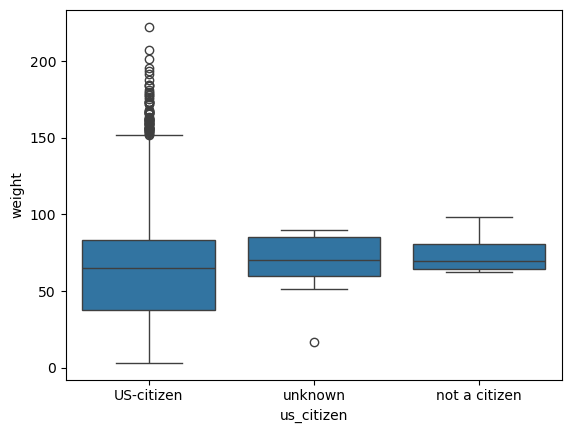

In [47]:
import seaborn as sns
sns.boxplot(data = data_merged, x = 'us_citizen', y = 'weight')

# Cancer

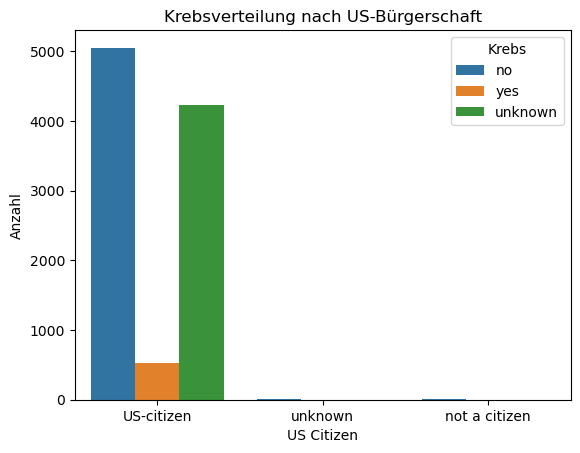

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gruppiertes Balkendiagramm
sns.countplot(data=data_merged, x='us_citizen', hue='cancer')
plt.title('Krebsverteilung nach US-Bürgerschaft')
plt.xlabel('US Citizen')
plt.ylabel('Anzahl')
plt.legend(title='Krebs')
plt.show()

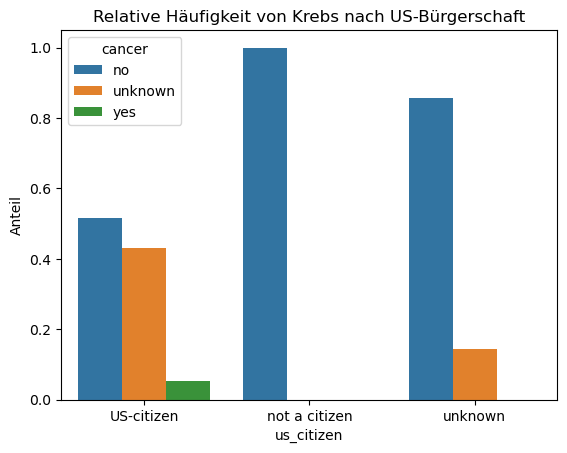

In [49]:
import pandas as pd

# Prozentualer Anteil von Krebsfällen pro US-Bürgerstatus
prop_df = data_merged.groupby('us_citizen')['cancer'].value_counts(normalize=True).rename('proportion').reset_index()

sns.barplot(data=prop_df, x='us_citizen', y='proportion', hue='cancer')
plt.title('Relative Häufigkeit von Krebs nach US-Bürgerschaft')
plt.ylabel('Anteil')
plt.show()

<Axes: xlabel='diabetes', ylabel='weight'>

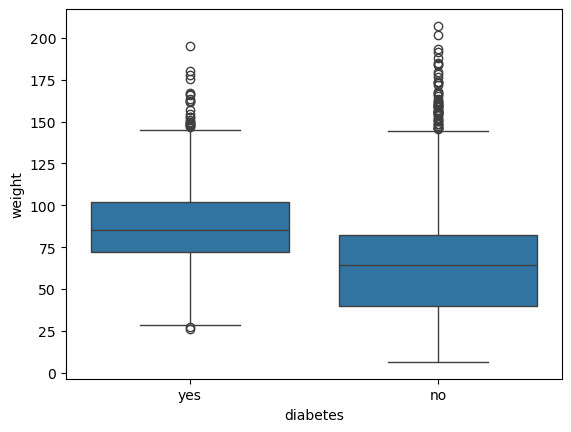

In [ ]:
# filter for age groups
import seaborn as sns
import matplotlib.pyplot as plt

data_diabetes = data_merged.loc[:,['diabetes', 'weight', 'height']]

data_diabetes = data_diabetes[(data_diabetes['diabetes'] == 'yes') | (data_diabetes['diabetes'] == 'no')]

sns.boxplot(data_diabetes, x= 'diabetes', y='weight')



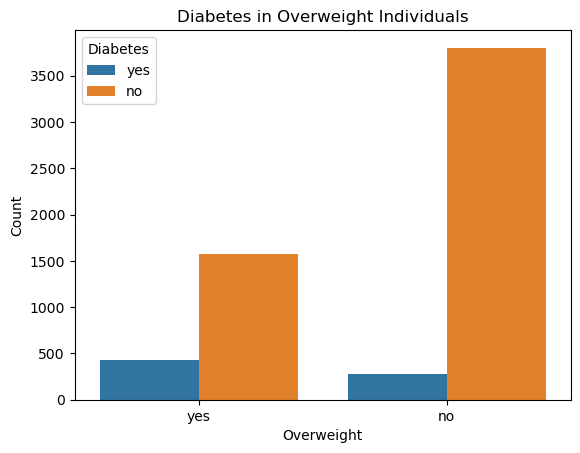

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

data_diabetes = data_merged.loc[:,['diabetes', 'weight', 'overweight', 'age']]

data_diabetes = data_diabetes[((data_diabetes['diabetes'] == 'yes') | (data_diabetes['diabetes'] == 'no')) & (data_diabetes['overweight'] != 'unknown')]

# sns.countplot(data_diabetes, x= 'overweight', y='diabetes')

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data_diabetes, x='overweight', hue='diabetes')
plt.title('Diabetes in Overweight Individuals')
plt.xlabel('Overweight')
plt.ylabel('Count')
plt.legend(title='Diabetes')
plt.show()

NameError: name 'data_beetus' is not defined